In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv(r'project_data/train_dataset.csv')
test = pd.read_csv(r'project_data/test_dataset.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3004 non-null   int64  
 1   director_name              3004 non-null   object 
 2   num_critic_for_reviews     3004 non-null   int64  
 3   duration                   3004 non-null   int64  
 4   director_facebook_likes    3004 non-null   int64  
 5   actor_3_facebook_likes     3004 non-null   int64  
 6   actor_2_name               3004 non-null   object 
 7   actor_1_facebook_likes     3004 non-null   int64  
 8   gross                      3004 non-null   int64  
 9   genres                     3004 non-null   object 
 10  actor_1_name               3004 non-null   object 
 11  movie_title                3004 non-null   object 
 12  num_voted_users            3004 non-null   int64  
 13  cast_total_facebook_likes  3004 non-null   int64

In [6]:
data.head()

,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,...,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,...,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


# Inspect Raw Data

In [7]:
# Find high rating movies under particular features
data.loc[
    data['imdb_score_binned'] == 4, 
    ['director_name', 'content_rating', 'country', 'num_voted_users', 'title_year']
].sample(10)

,director_name,content_rating,country,num_voted_users,title_year
2362,José Padilha,R,Brazil,81644,2007
77,Frank Darabont,R,USA,782610,1999
1161,Martin Scorsese,R,USA,333542,1995
2960,Stanley Kubrick,G,UK,427357,1968
958,Joel Coen,R,USA,537419,1998
886,James Cameron,R,UK,600266,1984
2137,Michel Gondry,R,USA,666937,2004
235,Brian De Palma,R,USA,537442,1983
613,Francis Ford Coppola,R,USA,790926,1974
111,Paul Greengrass,PG-13,USA,491077,2007


# Label Distribution

In [8]:
print(data['imdb_score_binned'].value_counts().sort_index())

0      24
1     235
2    1839
3     777
4     129
Name: imdb_score_binned, dtype: int64


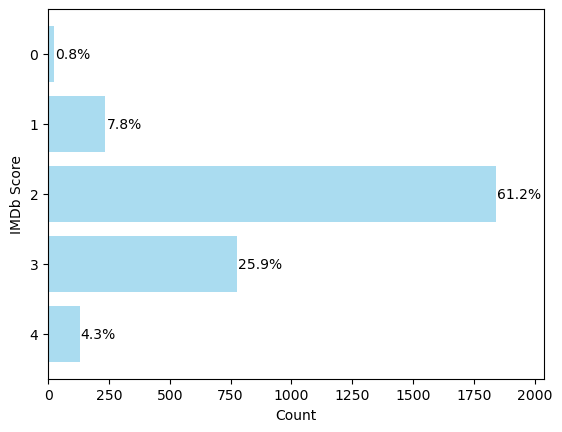

In [9]:
# Get value_counts without normalization
value_counts = data['imdb_score_binned'].value_counts()
value_counts = value_counts.sort_index()[::-1]

# Get percentage_counts with normalization
percentage_counts = data['imdb_score_binned'].value_counts(normalize=True)
percentage_counts = percentage_counts.sort_index()[::-1]

plt.figure() 

# Make bars closer together by increasing height
bars = plt.barh(range(len(value_counts)), value_counts.values, height=0.8, align='center', alpha=0.7, color='skyblue')

# Add percentage labels on the top
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, f'{percentage_counts.values[i] * 100:.1f}%', va='center')

plt.yticks(range(len(value_counts)), value_counts.index)
plt.ylabel('IMDb Score')
plt.xlabel('Count')

# Prevent the count label being outside the margin
plt.xlim(0, max(value_counts.values + 200))  # Add 100 for some padding
plt.show()


The distribution of the label is inbalanced. Rating 2 accounts the majority in the training set, while label 0 and 4 are the minority. Hence, the learning process on rating 0 is not sufficient, resulting in the classification models not leraning the essential characteristics of movies with a 0 rating.

# Feature Distribution

- ### *Numeric features*

In [10]:
data[['num_voted_users', 'movie_facebook_likes', 'num_user_for_reviews', 'duration', 'director_facebook_likes', 
      'num_critic_for_reviews', ]].describe().round(2)

,num_voted_users,movie_facebook_likes,num_user_for_reviews,duration,director_facebook_likes,num_critic_for_reviews
count,3004.00,3004.00,3004.00,3004.00,3004.00,3004.00
mean,104901.74,8972.18,335.92,110.08,778.89,165.61
std,150857.28,19853.89,415.22,21.91,2990.74,121.25
min,91.00,0.00,4.00,37.00,0.00,2.00
25%,18978.25,0.00,108.00,96.00,10.00,76.00
50%,53874.00,241.00,208.00,106.00,62.50,137.00
75%,128489.50,11000.00,398.00,120.00,234.00,223.00
max,1689764.00,197000.00,5060.00,330.00,23000.00,813.00


- ### *Categorical features*

### **country**

In [11]:
country_counts = data['country'].value_counts()

# Create a DataFrame from the counts
country_counts_df = pd.DataFrame(country_counts.reset_index())
country_counts_df.columns = ['Country', 'Count']

print(country_counts_df)
print(sum(country_counts_df['Count']))

           Country  Count
0              USA   2382
1               UK    255
2           France     86
3          Germany     61
4           Canada     46
5        Australia     32
6            Spain     21
7            Japan     12
8      New Zealand     10
9            China      9
10       Hong Kong      9
11           Italy      8
12     South Korea      7
13         Ireland      6
14          Mexico      6
15         Denmark      6
16          Brazil      4
17        Thailand      3
18    South Africa      3
19       Argentina      3
20            Iran      3
21     Netherlands      3
22           India      3
23          Norway      3
24          Taiwan      2
25  Czech Republic      2
26          Russia      2
27         Romania      2
28         Hungary      2
29        Colombia      1
30          Israel      1
31    West Germany      1
32   Official site      1
33     Afghanistan      1
34           Aruba      1
35           Chile      1
36         Finland      1
37         I

In [12]:
country_df = data[['country', 'imdb_score_binned']]

In [13]:
country_score = country_df.groupby('country')['imdb_score_binned'].agg(
    ['mean', 'count']
).sort_values(by='mean', ascending=False).round(2)
country_score

,mean,count
country,,
West Germany,4.00,1
Brazil,3.25,4
Denmark,3.17,6
New Zealand,3.10,10
Netherlands,3.00,3
Israel,3.00,1
Argentina,3.00,3
Iran,3.00,3
Indonesia,3.00,1


<Axes: >

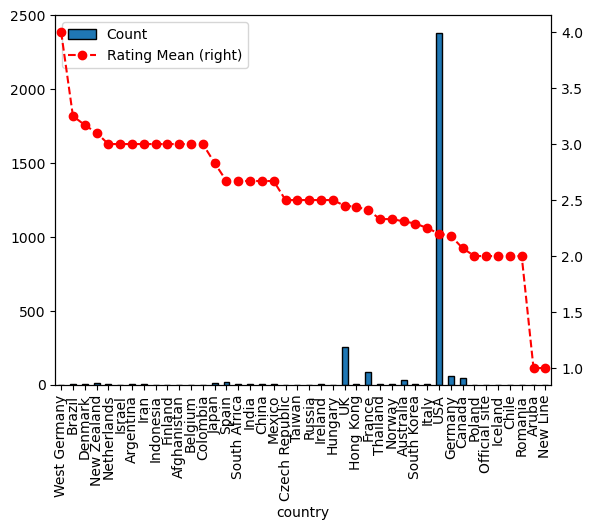

In [14]:
# Plotting
ax = country_score['count'].plot(
    kind='bar', label='Count', legend=True, edgecolor='black', use_index=False
)

country_score['mean'].plot(
    kind='line', label='Rating Mean', rot=90, legend=True, secondary_y = True,
    color='red', ax=ax, linestyle='--', marker='o'
)

### **content_rating**

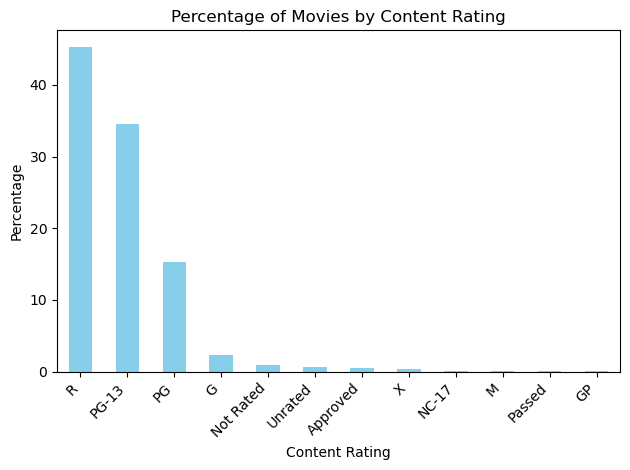

In [15]:
content_rating_counts = data['content_rating'].value_counts()

total_movies = len(data)
content_rating_percentages = content_rating_counts / total_movies * 100


plt.figure()
content_rating_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Content Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Movies by Content Rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### **language**

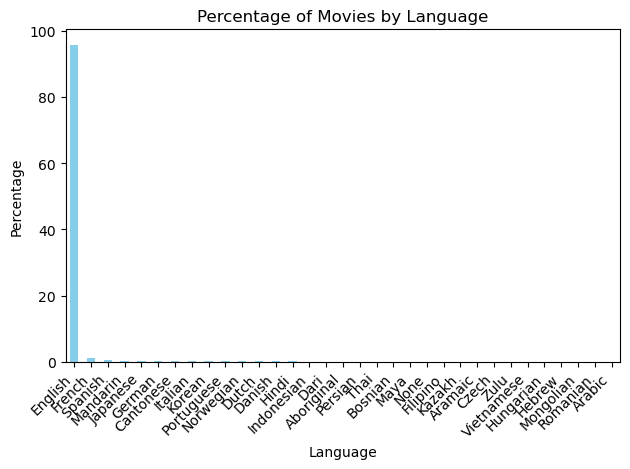

In [16]:
language_counts = data['language'].value_counts()

total_movies = len(data)
language_percentages = language_counts / total_movies * 100

plt.figure()
language_percentages.plot(kind='bar', color='skyblue')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.title('Percentage of Movies by Language')
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# Feature Selection

### **Mutual Information**

In [17]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

- ### *Numeric features*

In [18]:
categorical_cols = list(data.select_dtypes(include=['object']).columns)
numerical_cols = data.columns.difference(categorical_cols).drop(['id', 'imdb_score_binned'])
numerical_df = data[numerical_cols]
y = data['imdb_score_binned']

# Set random seed for reproducibility
np.random.seed(42)

# Compute mutual information scores for numerical features
mutual_info_numerical = mutual_info_classif(numerical_df, y)
feature_scores_numerical = pd.Series(mutual_info_numerical, index=numerical_df.columns)

rf = RandomForestClassifier()
cv_scores = []

# Sort the features based on mutual information scores
sorted_indices = np.argsort(-feature_scores_numerical.values)

for k in range(1, len(numerical_cols) + 1):
    # Select top k numerical features
    top_numerical_features = numerical_cols[sorted_indices[:k]].tolist()
    X = numerical_df[top_numerical_features]

    # Perform cross-validation and append the score to the list
    cv_score = cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)

# Find the optimal number of features based on the highest cross-validation score
optimal_num_features = np.argmax(cv_scores) + 1
print(f"Optimal number of features: {optimal_num_features}")

Optimal number of features: 14


In [19]:
# Get the top k numeric features and their scores
top_num_features = feature_scores_numerical.nlargest(optimal_num_features)
top_num_features_names = top_num_features.index
top_num_features_scores = top_num_features.values

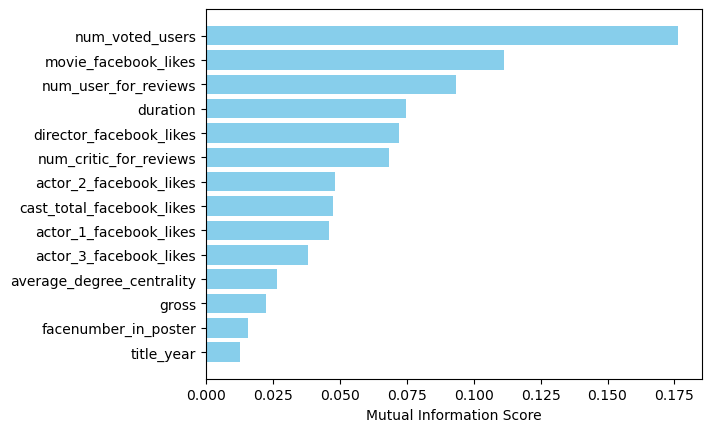

In [20]:
plt.figure()
plt.barh(top_num_features_names, top_num_features_scores, color='skyblue')
plt.xlabel('Mutual Information Score')
#plt.title(f'Top {optimal_num_features} Numerical Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

- ### *Categorical features*

In [21]:
# Set a random seed for reproducibility
np.random.seed(42)

# Assuming you have a DataFrame 'data' with categorical features and a target variable 'y'
categorical_cols = list(data.select_dtypes(include=['object']).columns)
categorical_cols.remove('movie_title')  # Remove the movie title column since title_embedding is its encoding

# Encode categorical features
encoded_data = data[categorical_cols].apply(LabelEncoder().fit_transform)

# Compute mutual information scores for categorical features
mutual_info_categorical = mutual_info_classif(encoded_data, y)
feature_scores_categorical = pd.Series(mutual_info_categorical, index=categorical_cols)

# Sort the scores in descending order and remove features with 0 score
sorted_scores_categorical = feature_scores_categorical[feature_scores_categorical > 0].sort_values(ascending=False)

# Perform cross-validation for different values of k
cv_scores = []
for k in range(1, len(sorted_scores_categorical) + 1):
    # Select top k categorical features
    top_categorical_features = sorted_scores_categorical.head(k).index.tolist()
    X = encoded_data[top_categorical_features]

    rf = RandomForestClassifier()

    # Perform cross-validation and compute mean accuracy
    cv_score = cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)

# Find the optimal k based on the highest cross-validation score
optimal_cat_features = np.argmax(cv_scores) + 1
print(f"Optimal number of features: {optimal_cat_features}")

Optimal number of features: 3


In [22]:
# Get the top k categorical features and their scores
top_cat_features = sorted_scores_categorical.nlargest(optimal_cat_features)
top_cat_features_names = top_cat_features.index
top_cat_features_scores = top_cat_features.values

In [23]:
top_cat_features_scores

array([0.02200971, 0.01908839, 0.01807365])

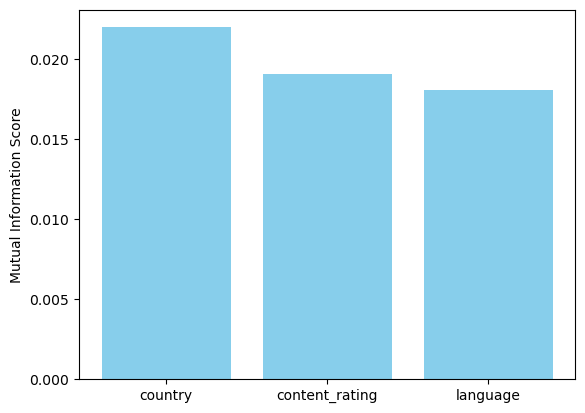

In [24]:
plt.figure()
plt.bar(top_cat_features_names, top_cat_features_scores, color='skyblue')
plt.ylabel('Mutual Information Score')
#plt.title(f'Top {optimal_cat_features} Categorical Features')
plt.show()

# Preprocessing
- ### *Grouping Low-Frequency Categories (5%) as "other"*

### **country**

In [25]:
total_country_count = data['country'].value_counts().sum()

# Calculate the 5% threshold
threshold = 0.05 * total_country_count

# Group countries with count less than threshold into 'Other'
country_counts = data['country'].value_counts()
selected_countries = country_counts[country_counts >= threshold]
other_count = country_counts[country_counts < threshold].sum()
selected_countries['Other'] = other_count

print(selected_countries)

USA      2382
UK        255
Other     367
Name: country, dtype: int64


### **content_rating**

In [26]:
total_content_rating_count = data['content_rating'].value_counts().sum()

# Calculate the 5% threshold
threshold = 0.05 * total_content_rating_count

# Group content rating with count less than threshold into 'Other'
content_rating_counts = data['content_rating'].value_counts()
selected_content_ratings = content_rating_counts[content_rating_counts >= threshold]
other_count = content_rating_counts[content_rating_counts < threshold].sum()
selected_content_ratings['Other'] = other_count

print(selected_content_ratings)

R        1362
PG-13    1039
PG        458
Other     145
Name: content_rating, dtype: int64


### **language**

In [27]:
total_language_count = data['language'].value_counts().sum()

# Calculate the 5% threshold
threshold = 0.05 * total_language_count

# Group languages with count less than threshold into 'Other'
language_counts = data['language'].value_counts()
selected_languages = language_counts[language_counts >= threshold]
other_count = language_counts[language_counts < threshold].sum()
selected_languages['Other'] = other_count

print(selected_languages)

English    2872
Other       132
Name: language, dtype: int64


# Dimensionality Reduction on Datasets

In [28]:
def dim_reduction(df):
    ''' Perform dimensionality reduction on the datasetS by dropping irrelevant columns, and encoding categorical features for both training and testing datasets.
    '''
    df = df.drop([
        'id', 'movie_title', 'genres', 'plot_keywords', 'title_embedding', 
        'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name'
    ], axis=1)

    # country
    selected_countries = country_counts[country_counts >= threshold].index
    df['country'] = df['country'].apply(lambda x: x if x in selected_countries else 'Other')
    df = pd.concat([df, pd.get_dummies(df['country'], prefix='country')], axis=1)
    df.drop('country', axis=1, inplace=True)
    
    # content rating
    selected_content_ratings = content_rating_counts[content_rating_counts >= threshold].index
    df['content_rating'] = df['content_rating'].apply(lambda x: x if x in selected_content_ratings else 'Other')
    df = pd.concat([df, pd.get_dummies(df['content_rating'], prefix='content_rating')], axis=1)
    df.drop('content_rating', axis=1, inplace=True)

    # language
    df['language'] = (df['language'] == 'English').astype(int)  # English=1, non-English=0

    # put the label as the last column in the training dataset
    if 'imdb_score_binned' in df.columns:
        label = df.pop('imdb_score_binned')
        df['imdb_score_binned'] = label

    return df

In [29]:
clean_train = dim_reduction(data)
clean_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,movie_facebook_likes,average_degree_centrality,country_Other,country_UK,country_USA,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_R,imdb_score_binned
0,186,73,28,847,2000,422783777,644348,6458,0,656,...,17000,0.001576,0,0,1,1,0,0,0,4
1,252,97,0,233,654,20433940,78883,1876,8,662,...,0,0.000675,1,0,0,0,0,0,1,2
2,232,117,234,221,12000,371897,36494,13607,2,118,...,11000,0.003002,0,0,1,0,0,0,1,2
3,297,109,0,145,957,13782838,258078,1757,0,911,...,23000,0.001726,0,0,1,0,0,0,1,4
4,297,171,0,857,16000,313837577,1238746,22342,2,5060,...,21000,0.001876,1,0,0,0,0,1,0,4


In [30]:
clean_test = dim_reduction(test)
clean_test.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,country_Other,country_UK,country_USA,content_rating_Other,content_rating_PG,content_rating_PG-13,content_rating_R
0,27,118,14,400,2000,2246000,2302,3384,4,20,...,769,0,0.000375,0,0,1,0,1,0,0
1,339,141,0,404,749,47307550,104301,1948,4,269,...,463,28000,0.002176,0,0,1,0,0,0,1
2,78,95,89,388,963,37606,31836,2658,0,90,...,654,0,0.000900,1,0,0,0,0,0,1
3,226,117,0,818,15000,104054514,200359,16828,0,1009,...,1000,0,0.003452,0,0,1,0,0,0,1
4,97,104,38,690,801,3447339,29517,2667,7,79,...,727,0,0.000450,0,0,1,0,0,0,1


# Holdout
- train_dataset: includes complete training data
- test_dataset: includes complete testing data, but without label 

We need to slit train_dataset into two parts: train_dataset and validation_dataset, so that we can evaluate and optimize the models.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(
    clean_train.drop('imdb_score_binned', axis=1), clean_train['imdb_score_binned'], 
    test_size=0.25, random_state=42
)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2253, 22), (751, 22), (2253,), (751,))

### **Standardization**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Model Fitting

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# **0R**
- Baseline

In [37]:
zero_r = DummyClassifier(strategy='most_frequent')
zero_r.fit(X_train, y_train)
zero_r.score(X_train, y_train), zero_r.score(X_valid, y_valid)  #accuracy

(0.6120727918331114, 0.6125166444740346)

- ### 0R Model Prediction on Testset

In [38]:
# Make predictions on the test set
y_pred = zero_r.predict(clean_test)

# Create a new DataFrame with only the 'id' column and the predicted labels
submission = test[['id']].copy()
submission['imdb_score_binned'] = y_pred

submission.to_csv('test_dataset_zeroR.csv', index=False)

- ### Error Analysis

In [39]:
print(classification_report(y_valid, zero_r.predict(X_valid), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.61      1.00      0.76       460
           3       0.00      0.00      0.00       201
           4       0.00      0.00      0.00        27

    accuracy                           0.61       751
   macro avg       0.12      0.20      0.15       751
weighted avg       0.38      0.61      0.47       751



In [40]:
confusion_matrix(y_valid, zero_r.predict(X_valid))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   0, 460,   0,   0],
       [  0,   0, 201,   0,   0],
       [  0,   0,  27,   0,   0]], dtype=int64)

<Axes: >

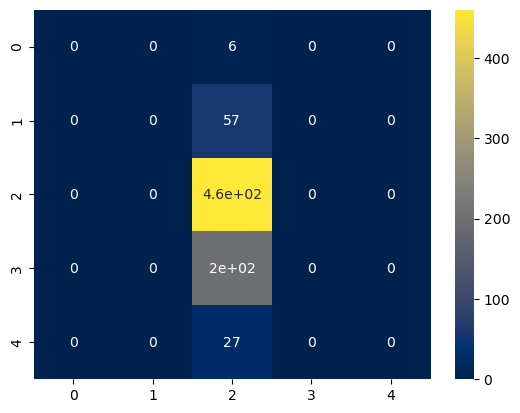

In [41]:
sns.heatmap(confusion_matrix(y_valid, zero_r.predict(X_valid)), annot=True, cmap='cividis')

# **Decision Trees & Random Forests** 

## **Decision Trees**

In [42]:
dt = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)  
dt.score(X_train, y_train), dt.score(X_valid, y_valid)  #accuracy

(1.0, 0.5885486018641811)

In [43]:
# Make predictions on the test set
y_pred = dt.predict(clean_test)

# Create a new DataFrame with only the 'id' column and the predicted labels
submission = test[['id']].copy()
submission['imdb_score_binned'] = y_pred

submission.to_csv('test_dataset_dt_before tuning.csv', index=False)

- #### **Hyperparameter Tuning**

In [44]:
# Example values for max_depth
param_range = np.arange(1, 50, 2)

# Calculate the training and test scores using validation_curve
dt_train_scores, dt_valid_scores = validation_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train,
    param_name='max_depth', param_range=param_range, cv=5, n_jobs=-1
)

In [45]:
dt_mean_train_scores = np.mean(dt_train_scores, axis=1)
dt_std_train_scores = np.std(dt_train_scores, axis=1)
dt_mean_valid_scores = np.mean(dt_valid_scores, axis=1)
dt_std_valid_scores = np.std(dt_valid_scores, axis=1)

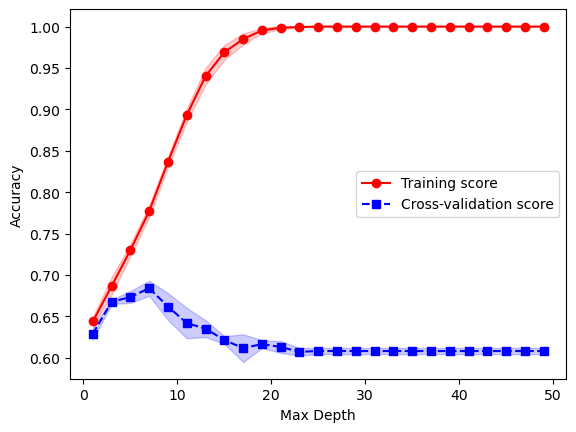

In [46]:
plt.figure()
plt.plot(param_range, dt_mean_train_scores, label='Training score', color='r', marker='o')
plt.fill_between(param_range, dt_mean_train_scores - dt_std_train_scores, dt_mean_train_scores + dt_std_train_scores, alpha=0.2, color='r')
plt.plot(param_range, dt_mean_valid_scores, label='Cross-validation score', color='b', marker='s', linestyle='--')
plt.fill_between(param_range, dt_mean_valid_scores - dt_std_valid_scores, dt_mean_valid_scores + dt_std_valid_scores, alpha=0.2, color='b')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
#plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.show()

In [47]:
# Find the index of the highest mean_valid_scores
index = np.argmax(dt_mean_valid_scores)

# Find the corresponding value in param_range
best_param_value = param_range[index]

print(f"The highest mean_valid_scores is {dt_mean_valid_scores[index]}, and the corresponding value in max_depth is {best_param_value}.")

The highest mean_valid_scores is 0.6839724069967972, and the corresponding value in max_depth is 7.


In [48]:
# refit using the best hyperparameter
dt = DecisionTreeClassifier(max_depth=best_param_value, random_state=42).fit(X_train, y_train)  
dt.score(X_train, y_train), dt.score(X_valid, y_valid)

(0.7656458055925432, 0.6844207723035952)

- ### Decision Trees Model Prediction on Testset

In [49]:
# Make predictions on the test set
y_pred = dt.predict(clean_test)

# Create a new DataFrame with only the 'id' column and the predicted labels
submission = test[['id']].copy()
submission['imdb_score_binned'] = y_pred

submission.to_csv('test_dataset_dt_after tuning.csv', index=False)

- ### Error Analysis

In [50]:
print(classification_report(y_valid, dt.predict(X_valid), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.05      0.10        57
           2       0.72      0.87      0.79       460
           3       0.58      0.49      0.53       201
           4       0.67      0.44      0.53        27

    accuracy                           0.68       751
   macro avg       0.59      0.37      0.39       751
weighted avg       0.69      0.68      0.65       751



In [51]:
confusion_matrix(y_valid, dt.predict(X_valid))

array([[  0,   0,   6,   0,   0],
       [  0,   3,  52,   2,   0],
       [  0,   0, 400,  59,   1],
       [  0,   0,  97,  99,   5],
       [  0,   0,   4,  11,  12]], dtype=int64)

<Axes: >

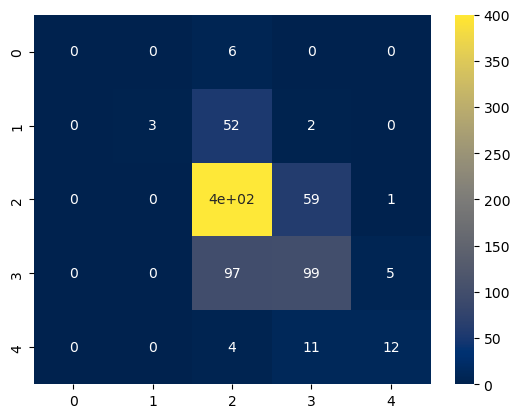

In [52]:
sns.heatmap(confusion_matrix(y_valid, dt.predict(X_valid)), annot=True, cmap='cividis')

## **Random Forests**

In [53]:
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_valid, y_valid)

(1.0, 0.711051930758988)

In [54]:
# Make predictions on the test set
y_pred = rf.predict(clean_test)

# Create a new DataFrame with only the 'id' column and the predicted labels
submission = test[['id']].copy()
submission['imdb_score_binned'] = y_pred

submission.to_csv('test_dataset_rf_before tuning.csv', index=False)

- **Hyperparameter Tuning**

In [55]:
# Example values for n_estimators
param_range = np.linspace(10, 500, 50).astype(int)

rf_train_scores, rf_valid_scores = validation_curve(
    RandomForestClassifier(random_state=42), X_train, y_train,
    param_name='n_estimators', param_range=param_range, cv=5, n_jobs=-1
)

In [56]:
rf_mean_train_scores = np.mean(rf_train_scores, axis=1)
rf_std_train_scores = np.std(rf_train_scores, axis=1)
rf_mean_valid_scores = np.mean(rf_valid_scores, axis=1)
rf_std_valid_scores = np.std(rf_valid_scores, axis=1)

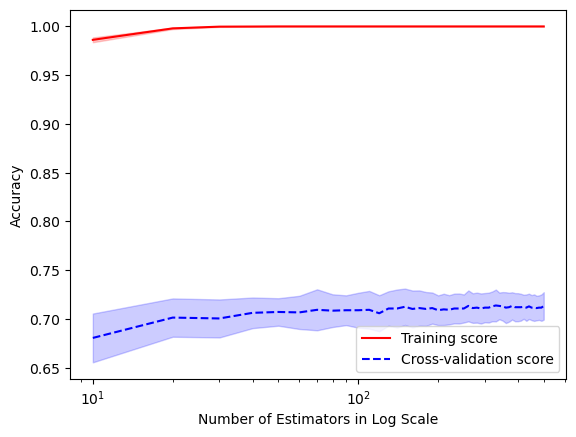

In [57]:
plt.semilogx(param_range, rf_mean_train_scores, label='Training score', color='r')
plt.fill_between(param_range, rf_mean_train_scores - rf_std_train_scores, rf_mean_train_scores + rf_std_train_scores, alpha=0.2, color='r')
plt.semilogx(param_range, rf_mean_valid_scores, label='Cross-validation score', color='b', linestyle='--')
plt.fill_between(param_range, rf_mean_valid_scores - rf_std_valid_scores, rf_mean_valid_scores + rf_std_valid_scores, alpha=0.2, color='b')
plt.xlabel('Number of Estimators in Log Scale')
plt.ylabel('Accuracy')
#plt.title('Validation Curve for hyperparamter n_estimators in Random Forest')
plt.legend()
plt.show()

In [58]:
# Find the index of the highest mean_valid_scores
index = np.argmax(rf_mean_valid_scores)

# Find the corresponding value in param_range
best_param_value = param_range[index]

print(f"The highest mean_valid_scores is {rf_mean_valid_scores[index]}, and the corresponding value in param_range is {best_param_value}.")

The highest mean_valid_scores is 0.7137068243409708, and the corresponding value in param_range is 330.


In [59]:
# refit using the best hyperparameter
rf = RandomForestClassifier(n_estimators=best_param_value, random_state=42).fit(X_train, y_train)
rf.score(X_train, y_train), rf.score(X_valid, y_valid)

(1.0, 0.7203728362183754)

In [60]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

num_voted_users              0.133946
num_user_for_reviews         0.088895
duration                     0.077899
title_year                   0.072628
gross                        0.069883
num_critic_for_reviews       0.066573
director_facebook_likes      0.062097
actor_3_facebook_likes       0.060847
movie_facebook_likes         0.060367
cast_total_facebook_likes    0.056810
actor_2_facebook_likes       0.055622
average_degree_centrality    0.049972
actor_1_facebook_likes       0.048851
facenumber_in_poster         0.026289
content_rating_PG-13         0.014392
content_rating_R             0.011663
language                     0.011027
country_USA                  0.009214
content_rating_PG            0.007280
country_UK                   0.006143
country_Other                0.005402
content_rating_Other         0.004202
dtype: float64

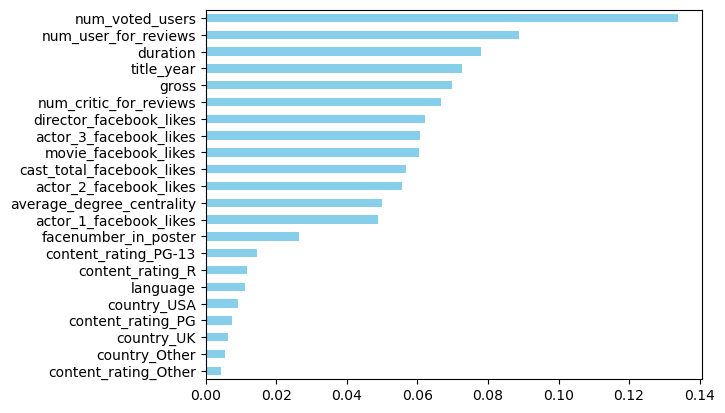

In [61]:
plot = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=True).plot(kind='barh', color='skyblue')

- ### Random Forests Model Prediction on Testset

In [62]:
# Make predictions on the test set
y_pred = rf.predict(clean_test)

# Create a new DataFrame with only the 'id' column and the predicted labels
submission = test[['id']].copy()
submission['imdb_score_binned'] = y_pred

submission.to_csv('test_dataset_rf_after tuning.csv', index=False)

- ### Error Analysis

In [63]:
print(classification_report(y_valid, rf.predict(X_valid), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00        57
           2       0.73      0.93      0.82       460
           3       0.69      0.51      0.58       201
           4       0.75      0.44      0.56        27

    accuracy                           0.72       751
   macro avg       0.43      0.38      0.39       751
weighted avg       0.66      0.72      0.68       751



In [64]:
confusion_matrix(y_valid, rf.predict(X_valid))

array([[  0,   0,   6,   0,   0],
       [  0,   0,  57,   0,   0],
       [  0,   0, 427,  32,   1],
       [  0,   0,  96, 102,   3],
       [  0,   0,   1,  14,  12]], dtype=int64)

<Axes: >

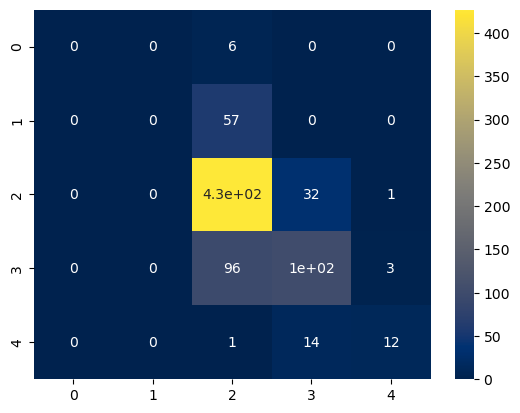

In [65]:
sns.heatmap(confusion_matrix(y_valid, rf.predict(X_valid)), annot=True, cmap='cividis')